In [9]:
import keras
from keras.api import layers
from keras.api.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
DATASET1 = '/Datasets/DS-1/'
DATASET2 = '/Datasets/DS-2/'

INPUT_SHAPE = (28, 28)
CLASSES = 10

EPOCHS = 10

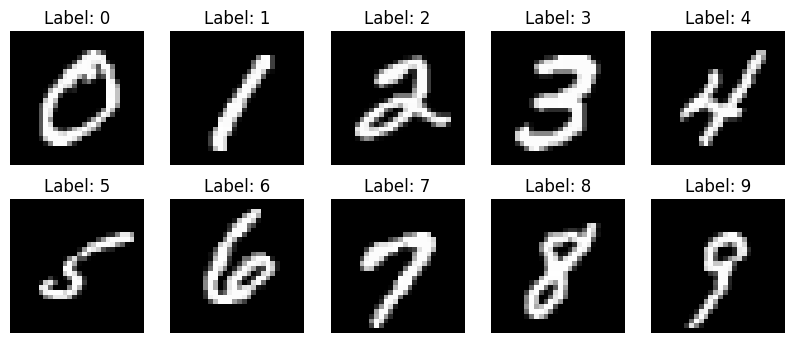

In [11]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

used=[]
counter = 0
i = 0
plt.figure(figsize=(10, 4))
while counter != 10:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [7]:
model = Sequential(name='Model-1')

model.add(layers.Input(shape=INPUT_SHAPE))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_1'))
model.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_2'))
model.add(layers.Dense(units=128, activation='relu', use_bias=True, name='Dense_3'))
model.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_4'))
model.add(layers.Dense(units=32, activation='relu', use_bias=True, name='Dense_5'))
model.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_6'))

model.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576,810 (2.20 MB)

 Trainable params: 576,810 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

history_df = pd.DataFrame({
    'Epoch': range(1, len(history.history['accuracy']) + 1),
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})


display(history_df)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8776 - loss: 0.3903 - val_accuracy: 0.9619 - val_loss: 0.1261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9686 - loss: 0.1021 - val_accuracy: 0.9737 - val_loss: 0.0976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9783 - loss: 0.0730 - val_accuracy: 0.9709 - val_loss: 0.0998
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9836 - loss: 0.0537 - val_accuracy: 0.9743 - val_loss: 0.0995
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9867 - loss: 0.0422 - val_accuracy: 0.9784 - val_loss: 0.0891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9754 - val_loss: 0.0990
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9801 - val_loss: 0.0807
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0

,Epoch,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,1,0.932400,0.9619,0.224135,0.126062
1,2,0.970317,0.9737,0.098651,0.097580
2,3,0.978433,0.9709,0.073517,0.099816
3,4,0.982717,0.9743,0.056930,0.099495
4,5,0.986300,0.9784,0.045653,0.089063
5,6,0.987950,0.9754,0.039643,0.099003
6,7,0.990417,0.9801,0.032263,0.080706
7,8,0.991100,0.9826,0.030725,0.072246
8,9,0.992550,0.9812,0.026225,0.078487
9,10,0.993383,0.9805,0.024059,0.085425
